<a href="https://colab.research.google.com/github/joscho11/Curry/blob/main/Group_4_Project_Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Key Factors that cause Violent Crime within Baltimore



Group Members: Prudhvi, Pooja, Luis, Alex, Abishek, Joseph

Question: What are the features that lead to a high rate of violent crime within a neighborhood in Baltimore?

Violent Crime is defined as shooting, aggravated assault, and homicide

you need to perform some very basic EDA (Exploratory Data Analysis) to see if the dataset(s)you have identified can be used to answer your research questions. You need to clearly identify the potential features and their nature (e.g. continuous or categorical) in your project. Moreover, your target variable(s) and their nature should be specified clearly. Portion of missing values, number of outliers in your dataset(s), strong correlation among potential features, amount of correlation between potential features and the target variable(s) could be among the things you report in this part of your proposal


# Violent Crime EDA

Joseph



Target Variable Identified: Violent Crime in Baltimore measured by incident. Violent Crime includes crime labeled as shooting, aggravated assult, or homicide.

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)

crime_df = pd.read_csv('/content/Part_1_Crime_Data.csv')
crime_df.head()

<ipython-input-185-8da40324cc24>:4: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('/content/Part_1_Crime_Data.csv')


,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.593549,39.357869,1,12H05854,2012/08/11 21:00:00+00,7A,AUTO THEFT,NaN,NaN,414.0,M,NaN,UNKNOWN,NaN,5600 PURDUE AVE,NORTHEAST,NaN,WOODBOURNE HEIGHTS,39.357869,-76.593549,"(39.357869,-76.593549)",STREET,1
1,-76.547922,39.336469,2,12H05411,2012/08/11 03:00:00+00,4A,AGG. ASSAULT,NaN,FIREARM,444.0,M,55.0,BLACK_OR_AFRICAN_AMERICAN,NaN,4400 LASALLE AVE,NORTHEAST,NaN,FRANKFORD,39.336469,-76.547922,"(39.336469,-76.547922)",ROW/TOWNHOUSE-OCC,1
2,-76.543162,39.348994,3,12H05922,2012/08/11 23:30:00+00,6D,LARCENY FROM AUTO,NaN,NaN,425.0,NaN,NaN,UNKNOWN,NaN,6100 FAIRWOOD AVE,NORTHEAST,NaN,GLENHAM-BELHAR,39.348994,-76.543162,"(39.348994,-76.543162)",PARKING LOT-INSIDE,1
3,-76.615621,39.295736,4,12H05661,2012/08/11 20:15:00+00,6J,LARCENY,NaN,NaN,124.0,F,26.0,WHITE,NaN,500 N CHARLES ST,CENTRAL,NaN,MOUNT VERNON,39.295736,-76.615621,"(39.295735576797313,-76.615620695709538)",STREET,1
4,-76.602463,39.292888,5,12H05372,2012/08/11 03:30:00+00,4E,COMMON ASSAULT,NaN,NaN,211.0,F,24.0,BLACK_OR_AFRICAN_AMERICAN,NaN,1100 COMET ST,SOUTHEAST,NaN,PLEASANT VIEW GARDENS,39.292888,-76.602463,"(39.292888,-76.602463)",ROW/TOWNHOUSE-OCC,1


In [161]:
crime_df.describe()

,X,Y,RowID,Inside_Outside,Post,Age,Latitude,Longitude,Total_Incidents
count,602386.000000,602386.000000,603402.00,0.0,595462.000000,486461.00000,602386.000000,602386.000000,603402.0
mean,-75.773981,38.873990,301701.50,NaN,504.461521,37.91689,38.873990,-75.773981,1.0
...,...,...,...,...,...,...,...,...,...
75%,-76.586146,39.326516,452551.75,NaN,724.000000,49.00000,39.326516,-76.586146,1.0
max,0.000000,39.372088,603402.00,NaN,943.000000,8251.00000,39.372088,0.000000,1.0


In [162]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603402 entries, 0 to 603401
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                602386 non-null  float64
 1   Y                602386 non-null  float64
 2   RowID            603402 non-null  int64  
 3   CCNumber         603402 non-null  object 
 4   CrimeDateTime    603402 non-null  object 
 5   CrimeCode        603402 non-null  object 
 6   Description      603402 non-null  object 
 7   Inside_Outside   0 non-null       float64
 8   Weapon           148964 non-null  object 
 9   Post             595462 non-null  float64
 10  Gender           506593 non-null  object 
 11  Age              486461 non-null  float64
 12  Race             580287 non-null  object 
 13  Ethnicity        75440 non-null   object 
 14  Location         600328 non-null  object 
 15  Old_District     563498 non-null  object 
 16  New_District     31962 non-null   obje

In [163]:
print("null values in each category: ")

crime_df.isnull().sum()

null values in each category: 


X                    1016
Y                    1016
                    ...  
PremiseType        137883
Total_Incidents         0
Length: 23, dtype: int64

In [164]:
print("Amount of samples before cleaning: ")
print(crime_df.shape)
print("\n")

crime_desc = ['AGG. ASSAULT', 'HOMICIDE', 'SHOOTING']
crime_df = crime_df[crime_df['Description'].isin(crime_desc)]

print("Amount of samples that are a violent crime: ")
print(crime_df.shape)

crime_df = crime_df.dropna(subset=['Neighborhood'])

Amount of samples before cleaning: 
(603402, 23)


Amount of samples that are a violent crime: 
(79776, 23)


In [165]:
# count the number of violent crimes within each neighborhood
nei_count = crime_df.groupby('Neighborhood').size().reset_index(name='Violent_Crimes')

nei_count

,Neighborhood,Violent_Crimes
0,ABELL,127
1,ALLENDALE,465
...,...,...
273,YALE HEIGHTS,209
274,YORK-HOMELAND,35


#Vacant Building Notices

Alex

https://data.baltimorecity.gov/datasets/baltimore::vacant-building-notices/explore?location=39.296363%2C-76.620458%2C10.60&showTable=true

Dataset shows the vacant and building notices per property. Quantified to show the amount of vancancies by each negihborhood.

In [166]:
import numpy as np
import pandas as pd

# Importing dataset
house_df = pd.read_csv("/Vacant_Building_Notices.csv")

house_df.head()

,X,Y,OBJECTID,NoticeNum,DateNotice,DateCancel,DateAbate,NT,OWNER_ABBR,HousingMarketTypology2017,Council_District,Neighborhood,BLOCKLOT,Address
0,1.411074e+06,598468.355480,723192,805231A,2012/01/25 15:37:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 003,2041 W NORTH AVE
1,1.411088e+06,598469.087434,723193,1780434A,2019/04/20 08:55:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 004,2039 W NORTH AVE
2,1.411131e+06,598471.043467,723196,927919A,2013/02/01 14:19:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 007,2033 W NORTH AVE
3,1.411144e+06,598471.677324,723197,2106499A,2022/05/13 16:20:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 008,2031 W NORTH AVE
4,1.411214e+06,598474.912882,723202,2078873A,2022/02/10 16:01:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 013,2021 W NORTH AVE


In [167]:
# Listing Neighborhoods with the amount of vancancies each one has
house_count = house_df.groupby('Neighborhood').size().reset_index(name='Vacancies')

#house_count = house_count.sort_values(ascending=False)

# Showing the original datasaet points
print('Number of sample points of dataset:', house_df.shape, '\n')

# Showing the sample points of the modified dataset
print('Number of sample points of the houses in each neighborhood:', house_count.shape, '\n')

# Displaying the modified dataset to see how many vacancies there are for each neighborhood
print(house_count)

Number of sample points of dataset: (13565, 14) 

Number of sample points of the houses in each neighborhood: (224, 2) 

                                  Neighborhood  Vacancies
0    ABELL                                             11
1    ALLENDALE                                         59
..                                         ...        ...
222  WRENLANE                                          13
223  YALE HEIGHTS                                       2

[224 rows x 2 columns]


In [168]:
house_count.head()

,Neighborhood,Vacancies
0,ABELL,11
1,ALLENDALE,59
2,ARCADIA,8
3,ARLINGTON,112
4,ASHBURTON,9


In [169]:
house_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  224 non-null    object
 1   Vacancies     224 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [170]:
# Stating the all neighborhoods from original and modified dataset
print(house_df.Neighborhood, '\n')
print(house_count)

0        EASTERWOOD                               
1        EASTERWOOD                               
                           ...                    
13563                                     DOWNTOWN
13564                                  HARLEM PARK
Name: Neighborhood, Length: 13565, dtype: object 

                                  Neighborhood  Vacancies
0    ABELL                                             11
1    ALLENDALE                                         59
..                                         ...        ...
222  WRENLANE                                          13
223  YALE HEIGHTS                                       2

[224 rows x 2 columns]


In [171]:
house_count['Neighborhood'] = house_count['Neighborhood'].str.strip()

# GUN OFFENDER REGISTRY

Luis

In [172]:
import numpy as np
import pandas as pd

gun_off_df = pd.read_csv('/Gun_Offenders_Registry.csv')

gun_off_df.head()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,GlobalID
0,1.407179e+06,599063.663408,1,23-0399,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Bullock,Aniyja,NaN,2002/05/10 00:00:00+00,Female,Black,"2807 Clifton Ave, Baltimore, Maryland, 21216",Baltimore,Md,21216.0,Western,731.0,Walbrook,39.3111,-76.6648,"(39.3111,-76.6648)",1bce1b2f-22bd-45b1-94a1-ab84c5e96c4f
1,NaN,NaN,2,23-0398,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Harper,Kamonte,Kaireem,1975/09/10 00:00:00+00,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",576f2d18-d902-4547-adbf-55415ccf1835
2,1.406444e+06,598951.702849,3,23-0397,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Mason,Duwan,Lamont,1998/06/11 00:00:00+00,Male,Black,"2023 N Longwood St, Baltimore, Maryland, 21216",Baltimore,Md,21216.0,Southwest,811.0,Walbrook,39.3108,-76.6674,"(39.3108,-76.6674)",de5cae18-b61e-4115-bd9e-72c90ca88360
3,1.402451e+06,591907.706139,4,23-0396,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Edison,Malik,NaN,1998/06/13 00:00:00+00,Male,Black,"3919 W Mulberry St, Baltimore, Maryland, 21229",Baltimore,Md,21229.0,Southwest,824.0,Allendale,39.2915,-76.6816,"(39.2915,-76.6816)",c44d98df-a356-4bda-af04-9ea9b31e18eb
4,NaN,NaN,5,23-0395,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Johnson,Kristopher,NaN,1988/03/20 00:00:00+00,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",69a4c17a-867f-40fe-99bb-1109d6146c8f


In [173]:
# Delete rows with empty values in 'Neighborhood'
gun_off_df = gun_off_df.dropna(subset=['Neighborhood'])

# Verification
empty_neighborhoods = gun_off_df['Neighborhood'].isnull().sum()
print("Number of empty values in 'Neighborhood' column after deletion:", empty_neighborhoods)


Number of empty values in 'Neighborhood' column after deletion: 0


In [174]:
# Grouping by Neighborhood
gun_off_df1 = gun_off_df.groupby('Neighborhood').size().reset_index(name='Gun_Offender_Count')

#making neighborhoods all caps
gun_off_df1['Neighborhood'] = gun_off_df1['Neighborhood'].str.upper()

gun_off_df1


,Neighborhood,Gun_Offender_Count
0,ABELL,2
1,ALLENDALE,23
...,...,...
214,WRENLANE,5
215,YALE HEIGHTS,16


# Baltimore city arrests - POOJA

https://data.baltimorecity.gov/datasets/bpd-arrests/explore?location=38.975551%2C-76.515650%2C8.93

Baltimore city arrests (arrest charges, such as assault, larceny, destruction of property)

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/BPD_Arrests.csv')

#display basic information about the dataset
print(dataset.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370757 entries, 0 to 370756
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  225725 non-null  float64
 1   Y                  225725 non-null  float64
 2   RowID              370757 non-null  int64  
 3   IncidentNumber     227837 non-null  object 
 4   ArrestNumber       354083 non-null  float64
 5   Age                370624 non-null  float64
 6   Gender             370723 non-null  object 
 7   Race               370670 non-null  object 
 8   ArrestDateTime     370757 non-null  object 
 9   ArrestLocation     231188 non-null  object 
 10  IncidentOffence    370757 non-null  object 
 11  IncidentLocation   231188 non-null  object 
 12  Charge             322492 non-null  object 
 13  ChargeDescription  370757 non-null  object 
 14  District           217698 non-null  object 
 15  Post               217698 non-null  float64
 16  Ne

In [176]:
#isplay summary statistics for numeric columns
print(dataset.describe())

                  X              Y     RowID  ArrestNumber            Age  \
count  2.257250e+05  225725.000000  370757.0  3.540830e+05  370624.000000   
mean   2.498954e+06  542039.145769  185379.0  1.499237e+07      33.233441   
...             ...            ...       ...           ...            ...   
75%    1.429274e+06  601097.022100  278068.0  1.800619e+07      42.000000   
max    3.207084e+07  621369.251000  370757.0  9.990540e+07     100.000000   

                Post       Latitude      Longitude  
count  217698.000000  225725.000000  225725.000000  
mean      516.381878      37.920018     -73.922573  
...              ...            ...            ...  
75%       733.000000      39.316500     -76.586800  
max       943.000000      39.372000       0.000000  

[8 rows x 8 columns]


In [177]:
#handling the missing data
print(dataset.isnull().sum())

X              145032
Y              145032
                ...  
Longitude      145032
GeoLocation         0
Length: 20, dtype: int64


<ipython-input-178-d7db025ec158>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


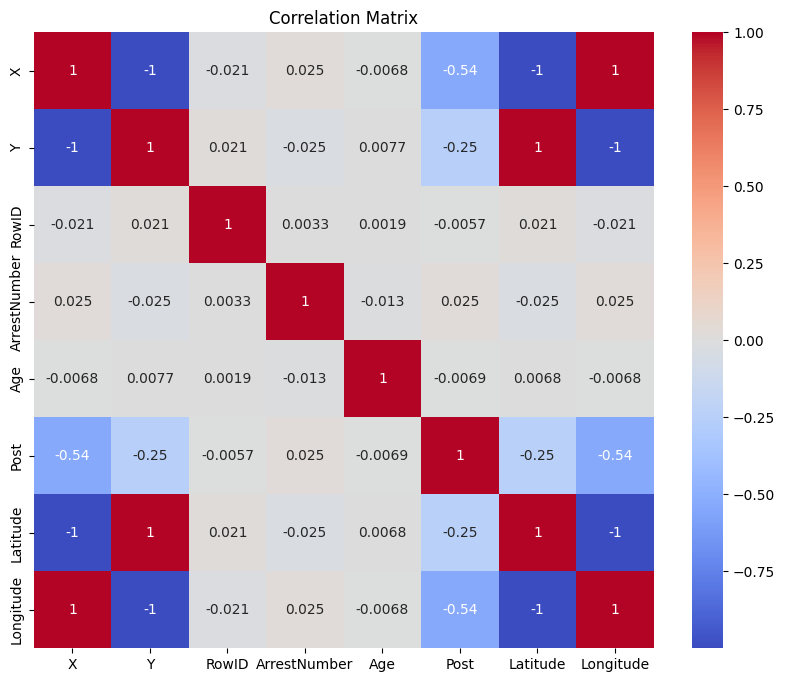

In [178]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [179]:
# Grouping by neighborhood
dataset_df = dataset.groupby('Neighborhood').size().reset_index(name='Arrests')

dataset_df['Neighborhood'] = dataset_df['Neighborhood'].str.upper()

dataset_df


,Neighborhood,Arrests
0,ABELL,309
1,ALLENDALE,938
...,...,...
274,YALE HEIGHTS,246
275,YORK-HOMELAND,52


In [180]:
datasetdf2 = dataset.groupby('ChargeDescription').size().reset_index(name='Count')
datasetdf2_sorted = datasetdf2.sort_values(by='ChargeDescription', ascending=True)

datasetdf2_sorted


,ChargeDescription,Count
0,!ST DEGREE ASSAUALT,1
1,!ST DEGREE ASSAULT,3
...,...,...
13519,ZND DEGREE ASSAULT,1
13520,PERSON DRIVING MOTOR VEH ON S,1


#**ENVIRONMENTAL CITATIONS - VENKATA PRUDHVI**

https://data.baltimorecity.gov/datasets/ff02bcc083724c2e84f6be1f4d05b450_0/explore

In [181]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Environmental_Citations.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,OBJECTID,CitationNo,LienCode,ViolationDate,DueDate,Agency,FineAmount,Description,Balance,LastPaidDate,LastPaidAmount,HearingDate,HearingRequestReceivedDate,CitationStatus,ViolationCodeArticle,ViolationCodeSection,ViolationLocation,Block,Lot,OfficerID,OfficerPresenceRequested,HearingStatus,HearTime,TotalPaid,TotalAbated,TotalVoided,Neighborhood,PoliceDistrict,CouncilDistrict,Location,GlobalID
0,1,2313252,L,2009/01/26 05:00:00+00,2009/02/25 05:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,NaN,NaN,O,HE,5-201,2212 PRESBURY ST,2302,012,452,,,,0.0,0.0,0.0,Coppin Heights/Ash-Co-East,Western,7.0,"(39.30793364,-76.65344787)",b081ae90-bcfe-47fe-9b59-ab9feb2357be
1,2,2708147,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,NaN,NaN,O,HE,5-201,WS LONG ISLAND AV,8186,020,417,,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27839051,-76.69754927)",89c8c72a-42e2-4293-a059-bb30c5666c34
2,3,2708154,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,NaN,NaN,O,HE,5-201,WS LONG ISLAND AV,8186,019A,417,,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27860883,-76.69752023)",a9b251df-69f0-45b3-86e1-55ee36108025
3,4,2708162,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,NaN,NaN,O,HE,5-201,WS LONG ISLAND AV,8186,019,417,,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27888220,-76.69748387)",b4533284-a768-499d-ab39-1aece2b73602
4,5,2810646,L,2005/07/06 04:00:00+00,2005/08/05 04:00:00+00,BALTIMORE CITY POLICE DEPARTMENT ...,60,HIGH GRASS AND WEEDS ...,180.0,NaN,0.0,NaN,NaN,O,03,304.2,3126 WOODLAND AVE,4616,031,927,,,,0.0,0.0,0.0,Central Park Heights,Northwestern,6.0,"(39.34586982,-76.67082210)",e0832299-de35-4d72-9703-378e5f4013e8


In [182]:
# Dataset Summary
summary = {
    'Total Records': data.shape[0],
    'Total Features': data.shape[1],
    'Feature Names': list(data.columns),
}

# Feature Types
feature_types = data.dtypes

# Missing Values Analysis
missing_values = data.isnull().sum()

# General Statistics for Numerical Features
numerical_stats = data.describe()

summary, feature_types, missing_values, numerical_stats


({'Total Records': 16000,
  'Total Features': 31,
  'Feature Names': ['OBJECTID',
   'CitationNo',
   'LienCode',
   'ViolationDate',
   'DueDate',
   'Agency',
   'FineAmount',
   'Description',
   'Balance',
   'LastPaidDate',
   'LastPaidAmount',
   'HearingDate',
   'HearingRequestReceivedDate',
   'CitationStatus',
   'ViolationCodeArticle',
   'ViolationCodeSection',
   'ViolationLocation',
   'Block',
   'Lot',
   'OfficerID',
   'OfficerPresenceRequested',
   'HearingStatus',
   'HearTime',
   'TotalPaid',
   'TotalAbated',
   'TotalVoided',
   'Neighborhood',
   'PoliceDistrict',
   'CouncilDistrict',
   'Location',
   'GlobalID']},
 OBJECTID       int64
 CitationNo     int64
                ...  
 Location      object
 GlobalID      object
 Length: 31, dtype: object,
 OBJECTID       0
 CitationNo     0
               ..
 Location      67
 GlobalID       0
 Length: 31, dtype: int64,
        OBJECTID    CitationNo    FineAmount       Balance  LastPaidAmount  \
 count  16000.00 

In [183]:
# Grouping by Neighborhood and counting the citations
citations_by_neighborhood = data.groupby('Neighborhood').size().reset_index(name='CitationsCount')

# Converting 'Neighborhood' to uppercase for consistency
citations_by_neighborhood['Neighborhood'] = citations_by_neighborhood['Neighborhood'].str.upper()

# Sorting the dataset by 'Neighborhood'
citations_by_neighborhood_sorted = citations_by_neighborhood.sort_values(by='Neighborhood', ascending=True)

# Grouping by Description and counting the citations
citations_by_description = data.groupby('Description').size().reset_index(name='Count')
citations_by_description_sorted = citations_by_description.sort_values(by='Description', ascending=True)

citations_by_neighborhood_sorted, citations_by_description_sorted


(      Neighborhood  CitationsCount
 0            ABELL               3
 1        ALLENDALE              35
 ..             ...             ...
 217   YALE HEIGHTS               4
 218  YORK-HOMELAND               2
 
 [219 rows x 2 columns],
                                            Description  Count
 0    ABANDONMENT OF ANIMAL                         ...     12
 1    ADVERTISEMENT - MISREPRESENTING FROZEN FOOD AS...      1
 ..                                                 ...    ...
 165  WORK OUTSIDE OR BEYOND SCOPE OF PERMIT        ...      2
 166  WORK WITHOUT PROPER PERMIT                    ...     29
 
 [167 rows x 2 columns])

https://data.baltimorecity.gov/datasets/ff02bcc083724c2e84f6be1f4d05b450_0/explore

#311 service requests

Abishek

In [147]:
df=pd.read_csv('/311_Customer_Service_Requests_2021.csv',low_memory=False)

df.dtypes

X              float64
Y              float64
                ...   
Longitude      float64
GeoLocation     object
Length: 25, dtype: object

In [148]:
df.head()

,X,Y,...,Longitude,GeoLocation
0,-76.683604,39.324759,...,-76.683604,"(39.324758579798340, -76.683603682000820)"
1,-76.615189,39.303635,...,-76.615189,"(39.303634654642366, -76.615189409069590)"
2,-76.683184,39.324875,...,-76.683184,"(39.324875369059440, -76.683184170958000)"
3,-76.683111,39.324901,...,-76.683111,"(39.324900601852180, -76.683111264574790)"
4,-76.616200,39.325928,...,-76.616200,"(39.325927793916880, -76.616200218855340)"


In [149]:
print(df.isnull().sum())

X              334909
Y              334909
                ...  
Longitude      334909
GeoLocation    334909
Length: 25, dtype: int64


In [150]:
df.replace('N/A', pd.NA, inplace=True)

In [151]:
df.describe()

,X,Y,...,Latitude,Longitude
count,652589.000000,652589.000000,...,652589.000000,652589.000000
mean,-76.618025,39.309565,...,39.309565,-76.618025
...,...,...,...,...,...
75%,-76.584086,39.329589,...,39.329589,-76.584086
max,-76.339711,39.571952,...,39.571952,-76.339711


In [152]:
print(df.isnull().sum())

X              334909
Y              334909
                ...  
Longitude      334909
GeoLocation    334909
Length: 25, dtype: int64


In [153]:
df=df[df['Neighborhood'].notnull()]

In [154]:
req_by_nbh=df.groupby('Neighborhood').size().reset_index(name='311 Requests')

#making them all caps
req_by_nbh['Neighborhood'] = req_by_nbh['Neighborhood'].str.upper()

In [155]:
req_by_nbh

,Neighborhood,311 Requests
0,ABELL,1055
1,ALLENDALE,4412
...,...,...
276,YALE HEIGHTS,2078
277,YORK-HOMELAND,100


#Correlation between features and target variable

In [189]:
crime_merge = pd.merge(nei_count, house_count, on='Neighborhood', how='outer')
crime_merge = pd.merge(crime_merge, gun_off_df1, on='Neighborhood', how='outer')
crime_merge = pd.merge(crime_merge, dataset_df, on='Neighborhood', how='left')
crime_merge = pd.merge(crime_merge, citations_by_neighborhood_sorted, on='Neighborhood', how='left')
crime_merge = pd.merge(crime_merge, req_by_nbh, on='Neighborhood', how='outer')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Shape of Neighborhood Dataset")
print(crime_merge.shape)
crime_merge

Shape of Neighborhood Dataset
(282, 7)


,Neighborhood,Violent_Crimes,Vacancies,Gun_Offender_Count,Arrests,CitationsCount,311 Requests
0,ABELL,127.0,11.0,2.0,309.0,3.0,1055
1,ALLENDALE,465.0,59.0,23.0,938.0,35.0,4412
2,ARCADIA,95.0,8.0,3.0,364.0,10.0,1450
3,ARLINGTON,504.0,112.0,14.0,2367.0,100.0,3049
4,ARMISTEAD GARDENS,237.0,NaN,1.0,474.0,2.0,791
5,ASHBURTON,141.0,9.0,5.0,262.0,7.0,1762
6,BALTIMORE HIGHLANDS,700.0,45.0,12.0,3408.0,55.0,3683
7,BARCLAY,523.0,62.0,12.0,1425.0,37.0,3595
8,BARRE CIRCLE,39.0,NaN,NaN,79.0,9.0,707
9,BAYVIEW,199.0,6.0,2.0,506.0,22.0,4956


<ipython-input-190-b2334da16aad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crime_merge.corr()


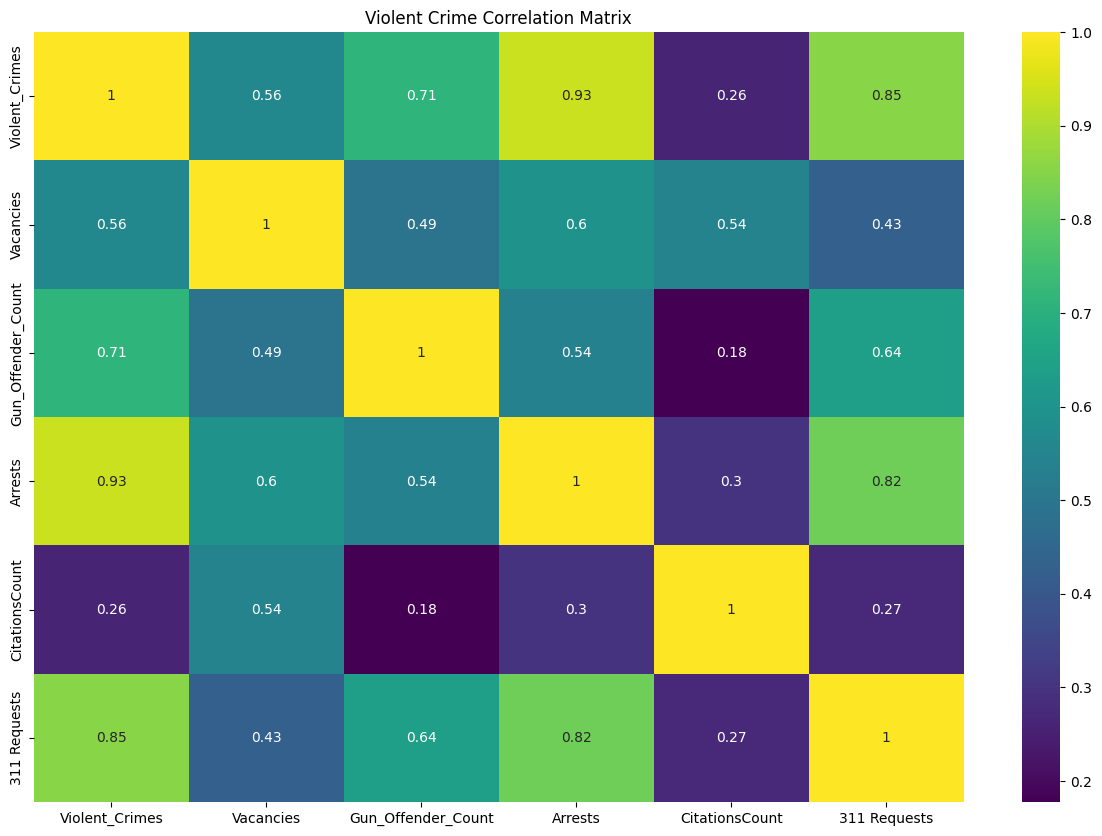

In [190]:
correlation_matrix = crime_merge.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Violent Crime Correlation Matrix')
plt.show()

In [191]:
crime_merge.corr()

<ipython-input-191-ca5a0d1a1e1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crime_merge.corr()


,Violent_Crimes,Vacancies,Gun_Offender_Count,Arrests,CitationsCount,311 Requests
Violent_Crimes,1.000000,0.561565,0.711877,0.934799,0.257819,0.852748
Vacancies,0.561565,1.000000,0.489926,0.595758,0.544340,0.426764
Gun_Offender_Count,0.711877,0.489926,1.000000,0.536715,0.177370,0.639265
Arrests,0.934799,0.595758,0.536715,1.000000,0.296395,0.818336
CitationsCount,0.257819,0.544340,0.177370,0.296395,1.000000,0.267640
311 Requests,0.852748,0.426764,0.639265,0.818336,0.267640,1.000000


Above you can see the dataset for our target variable (violent crimes) and features (vacancies, arrests, gun offender registry, citations, and 311 requests) in each neighborhood of Baltimore. From the correlation matrix it seems that Violent Crimes are heavily correlated with Arrests and 311 Requests. In addition, gun offender registry count is moderately correlated with vacancies following close behind. In last with a very low correlation score is citations.